# Extracting Edges from Images
By Adam Lang
* Date: 2/19/2024
* This notebook will give a general overview of extracting edges from images including background and theory.
* We will then manually implement this in code using a non-neural network approach in the Python library `scikit-image`.
* In another notebook we will demonstrate how to do this with a neural network architecture.

# Overview

**What is an `Edge`**
* edges are the boundary of objects present in an image.
* pixel values around an image edge will show immediate changes from left to right and up to down.
* pixel values are represented in a matrix or tensor in numerical form.

**Pixel Values**
* Significant differences in pixel values determine the location of an edge.
* Example below: we can see in the green box that there is a significant difference between 16 and 119 thus 16 would be an `edge` pixel.
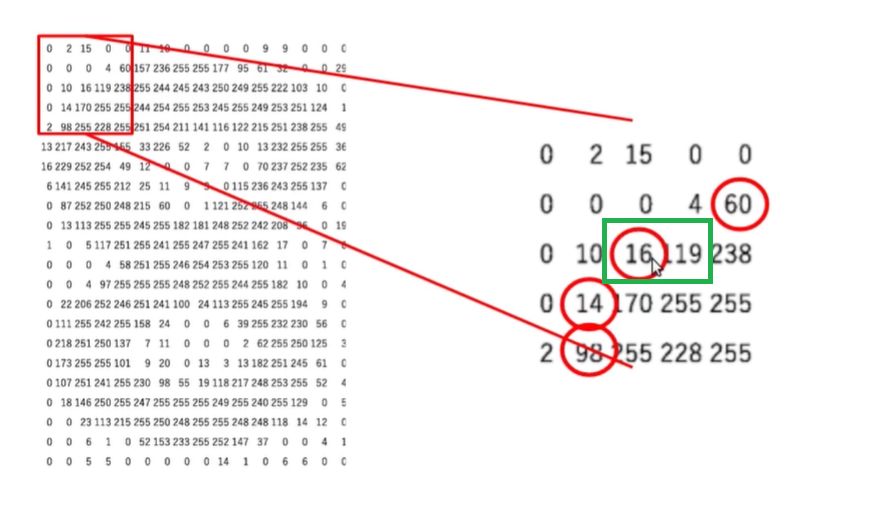

**When is a pixel value not an image edge?**
* Smaller matrix values without significant numeric differences will not correspond to an image edge.
* We can see in the image below the matrix has values mostly close to zero without significant changes.
* Above we saw the numeric jump from 16 to 119 thus we knew the color intensity was increasing and we reached the edge of the image.
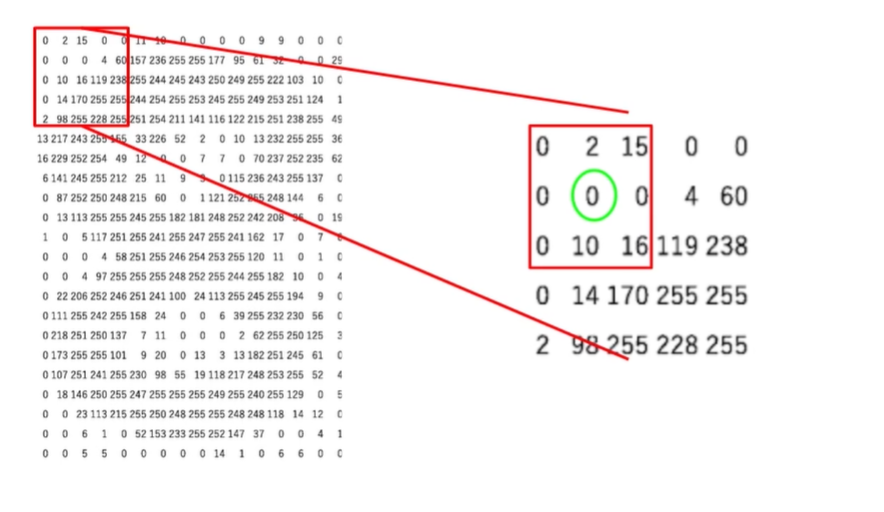


**Filter or Kernels**
* We can use element-wise multiplication to calculate the differences in pixel value.
* This is done using a `filter` or `kernel` via a sliding window.
* We slide this through the entire image generating a new matrix called the **FEATURE MAP** to show the significant differences and extract the edges from the image.

**Example 1 of filter/kernel**
* Matrix multiplication using the upper left of an image matrix/tensor.
* We can see we get a value of 31.

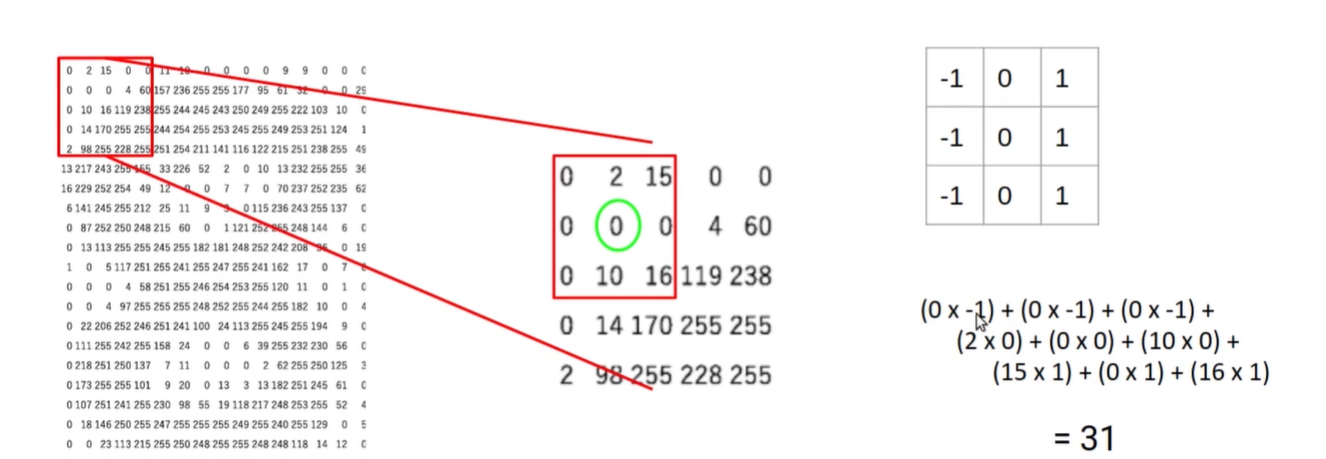

**Example 2 filter/kernel**
* As we move the **filter/kernel** around the image we generate new **feature maps**.
* This example shows a larger **feature map** value of **354** thus we are closer to the edge of the image whereas in example 1 we had a value of 31 which we can deduce is further away from the image edge.

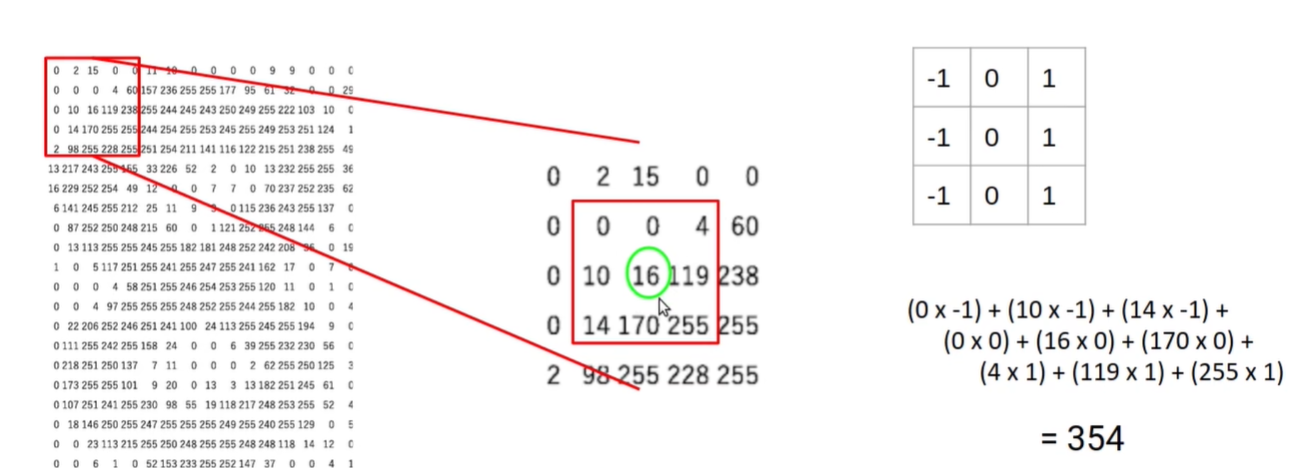

# Summary of above:
1. Edge pixels will have a significant difference in value than non-edge pixels.
2. We should always compare neighboring pixel values to extract image edges.
3. **Matrix** or **Kernel** is what we use to compare pixel values.
4. **Higher difference** => pixel is closer to the image edge.
5. **Lower difference** => pixel is NOT at the image edge.

# Kernel Types
* Difference in kernel X to Y is noted by 90 degree rotations.
* Source: https://www.projectrhea.org/rhea/index.php/An_Implementation_of_Sobel_Edge_Detection

* X Direction
1. Prewitt
2. Sobel - special attention given to values directly next to target pixel.

* Y Direction
1. Prewitt
2. Sobel - special attention given to values directly next to target pixel.

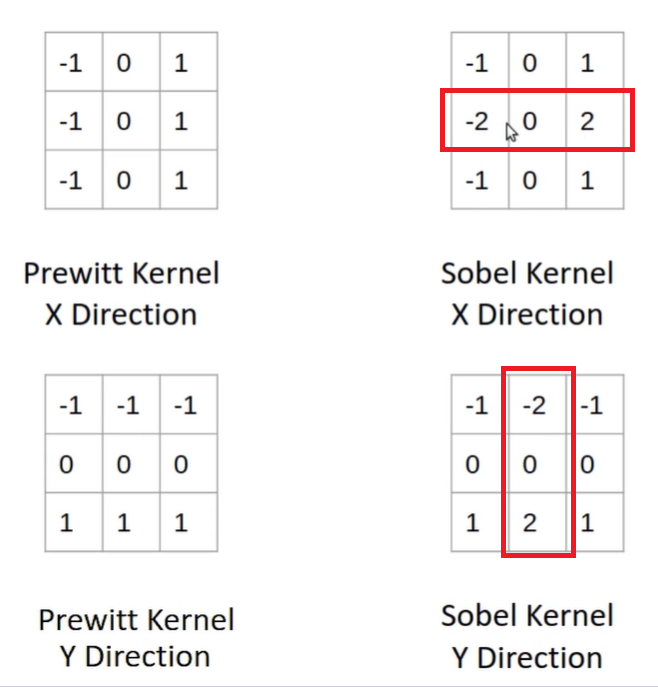

# Extracting Edges - Code Implementation
* We will use `scikit-image` library in Python.
* We will demonstrate the different filter/kernel methods.

## Loading required libraries and image file

In [8]:
# import libraries
from skimage.io import imread, imshow
from skimage.filters import sobel_h, prewitt_h, prewitt_v, sobel_v

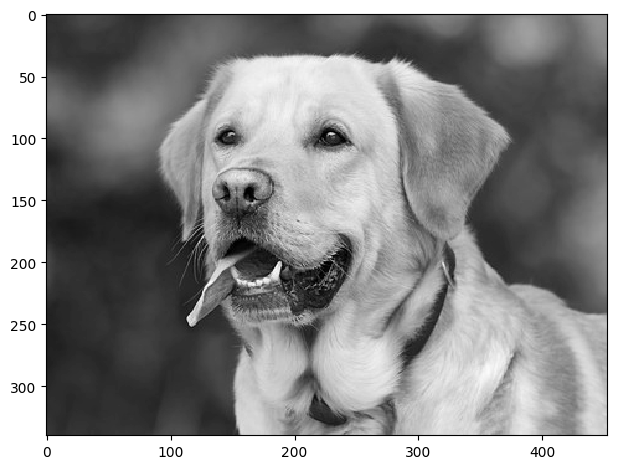

In [2]:
# reading image and plotting it
image = imread('/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks/dog.jpg', as_gray=True)
imshow(image, cmap='gray')

In [3]:
# detail shape of image
image.shape

(340, 453)

# Sobel Kernel
* X = horizontal
* Y = vertical
* Code below will give us 2 `FEATURE_MAPS`

In [4]:
# calculating horizontal edges using sobel kernel - X axis
edges_sobel_horizontal = sobel_h(image)

# calculating vertical edges using sobel kernel - Y axis
edges_sobel_vertical = sobel_v(image)

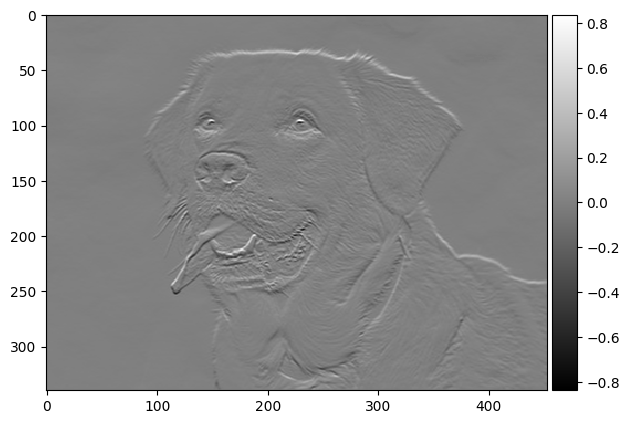

In [5]:
# plotting sobel horizontal edges
imshow(edges_sobel_horizontal, cmap = 'gray')

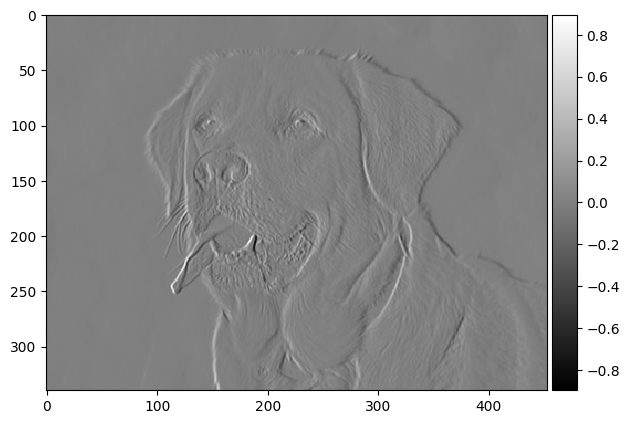

In [6]:
# plot sobel vertical edges
imshow(edges_sobel_vertical, cmap = 'gray')

# Prewitt Kernel
* X - horizontal
* Y - vertical
* 2 `FEATURE MAPS`

In [9]:
# calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)

# calculating vertical edges with prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

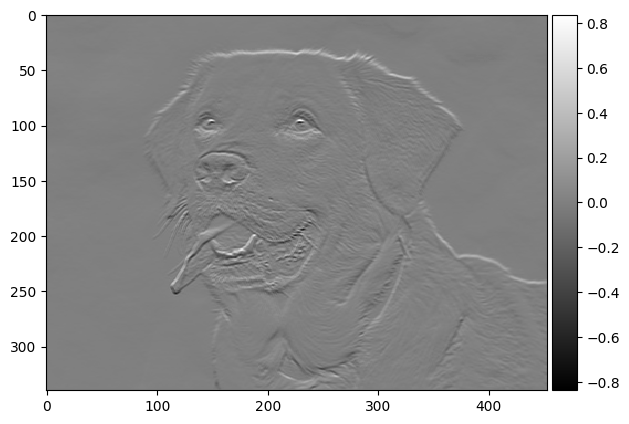

In [10]:
# plotting prewitt horizontal edges
imshow(edges_prewitt_horizontal, cmap='gray')

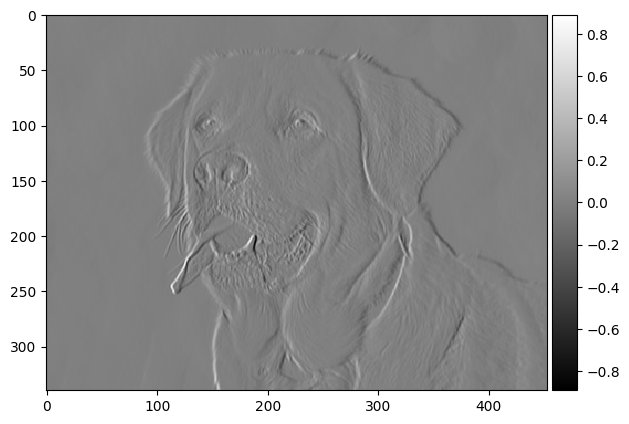

In [11]:
# plotting prewitt vertical edges
imshow(edges_prewitt_vertical, cmap='gray')

Summary:
* Using `scikit-image` we manually calculated the `feature maps` or `kernels` to extract the edges from each image.
* In another notebook we will use a neural network to do this where the network learns on its own how to extract the edges using feature maps/kernels.